**LSTM** **BTC**

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 0.0048
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 8.1426e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 7.2086e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 5.9416e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 5.6193e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 4.3776e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 7.2883e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 5.2170e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 4.3107e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 4.8319e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


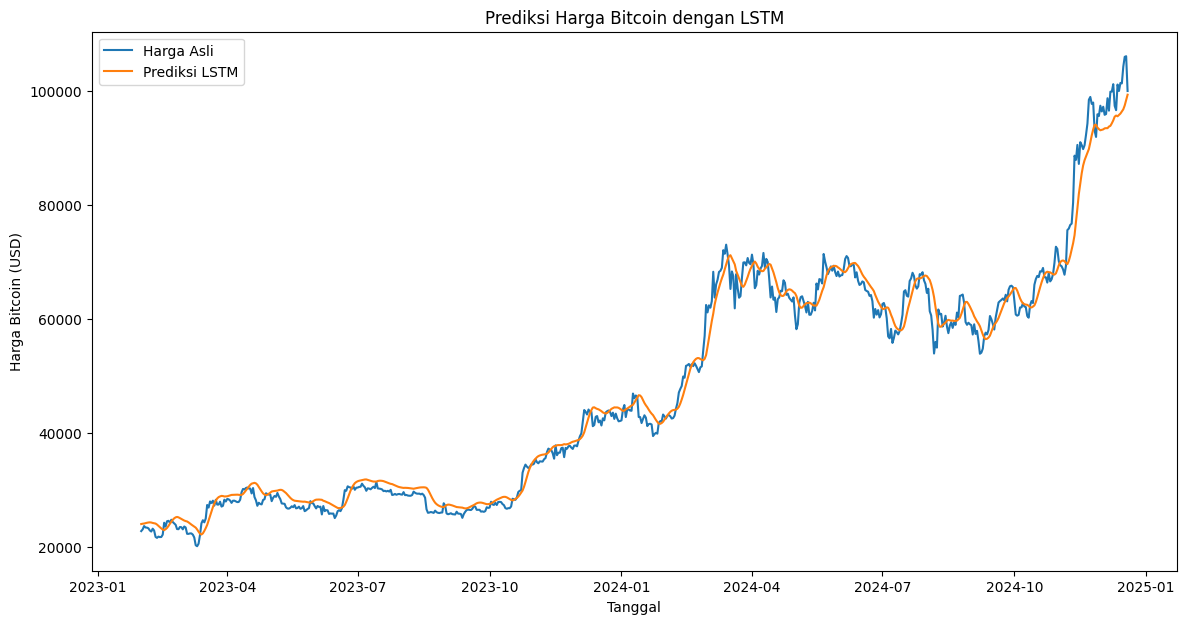

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Mengunduh data harga Bitcoin dari Yahoo Finance
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-12-31')

# 2. Menggunakan harga penutupan
data = btc_data['Close'].values
data = data.reshape(-1, 1)  # Mengubah bentuk data menjadi (n_samples, 1)

# 3. Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 4. Membagi data menjadi training dan test set
train_size = int(len(data_scaled) * 0.8)  # 80% untuk training
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# 5. Membentuk data input yang cocok untuk LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Mengambil 60 hari terakhir sebagai input
        y.append(data[i + time_step, 0])  # Harga di hari ke-61 (target)
    return np.array(X), np.array(y)

time_step = 60  # Menggunakan 60 hari data sebelumnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data menjadi bentuk yang diterima oleh LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 6. Membangun model LSTM
model = Sequential()

# Layer pertama LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout untuk menghindari overfitting

# Layer kedua LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Layer output (Dense layer)
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 7. Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 8. Melakukan prediksi dengan model
predictions = model.predict(X_test)

# 9. Mengembalikan hasil ke bentuk harga asli
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Visualisasi hasil prediksi
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index[-len(y_test_actual):], y_test_actual, label='Harga Asli')
plt.plot(btc_data.index[-len(predictions):], predictions, label='Prediksi LSTM')
plt.title('Prediksi Harga Bitcoin dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0103
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.1218e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 6.2050e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.7266e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 5.6428e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 5.2358e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 5.0909e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 5.7025e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 4.8106e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 4.4761e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


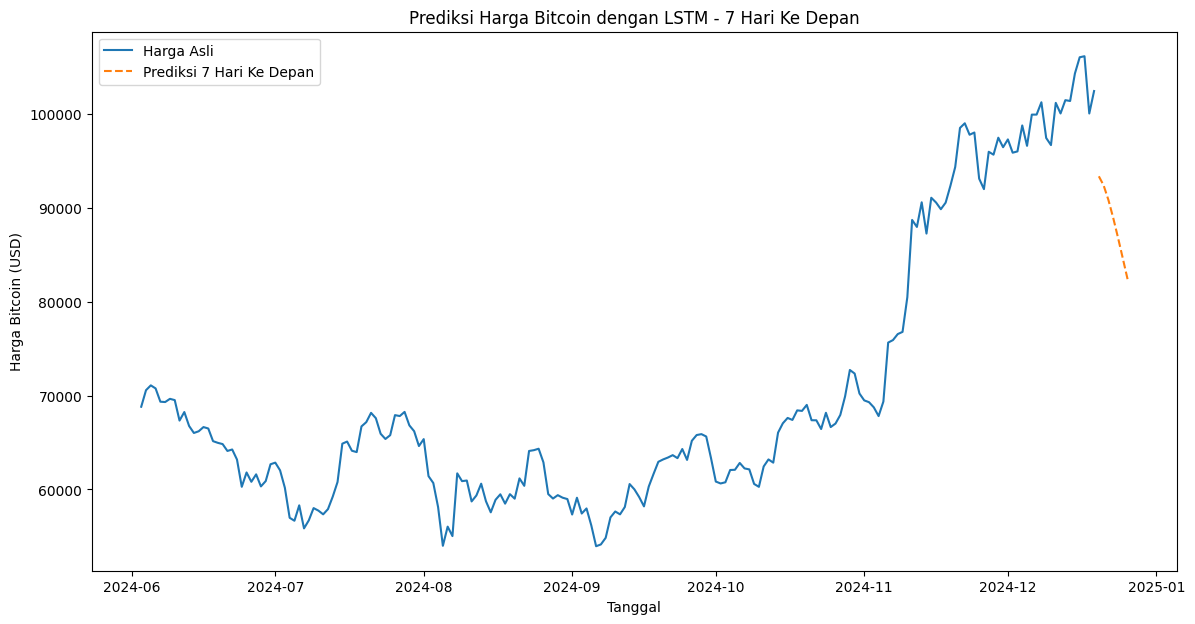

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Mengunduh data harga Bitcoin dari Yahoo Finance
btc_data = yf.download('BTC-USD', start='2009-01-01', end='2024-12-31')

# 2. Menggunakan harga penutupan
data = btc_data['Close'].values
data = data.reshape(-1, 1)  # Mengubah bentuk data menjadi (n_samples, 1)

# 3. Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 4. Membagi data menjadi training dan test set
train_size = int(len(data_scaled) * 0.8)  # 80% untuk training
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# 5. Membentuk data input yang cocok untuk LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Mengambil 60 hari terakhir sebagai input
        y.append(data[i + time_step, 0])  # Harga di hari ke-61 (target)
    return np.array(X), np.array(y)

time_step = 60  # Menggunakan 60 hari data sebelumnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data menjadi bentuk yang diterima oleh LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 6. Membangun model LSTM
model = Sequential()

# Layer pertama LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout untuk menghindari overfitting

# Layer kedua LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Layer output (Dense layer)
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 7. Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 8. Melakukan prediksi dengan model untuk 7 hari ke depan

# Gunakan data terakhir (dari test set) sebagai input untuk memulai prediksi
last_60_days = test_data[-time_step:].reshape(1, -1)
last_60_days = last_60_days.reshape((1, time_step, 1))

predictions = []
for i in range(7):  # Prediksi untuk 7 hari ke depan
    predicted_price = model.predict(last_60_days)
    predictions.append(predicted_price[0, 0])

    # Update input untuk prediksi berikutnya (masukkan prediksi terakhir sebagai input baru)
    last_60_days = np.append(last_60_days[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# 9. Mengembalikan hasil ke bentuk harga asli
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 10. Visualisasi hasil prediksi
predicted_dates = pd.date_range(btc_data.index[-1], periods=8, freq='D')[1:]

plt.figure(figsize=(14, 7))
plt.plot(btc_data.index[-200:], scaler.inverse_transform(test_data[-200:]), label='Harga Asli')
plt.plot(predicted_dates, predictions, label='Prediksi 7 Hari Ke Depan', linestyle='--')
plt.title('Prediksi Harga Bitcoin dengan LSTM - 7 Hari Ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.legend()
plt.show()


**VOLUME PERDAGANGAN**

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from textblob import TextBlob
import tweepy

# 1. Mengunduh data harga Bitcoin dari Yahoo Finance
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2024-12-31')

# Menambahkan volume perdagangan
btc_data['Volume'] = btc_data['Volume']

# 2. Menambahkan Sentimen Media Sosial dari Twitter
# Setup Twitter API
# Ganti dengan kredensial Anda
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Autentikasi ke Twitter
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Ambil tweet terkait Bitcoin
tweets = api.search_tweets(q="Bitcoin", count=100, lang="en")

# Lakukan analisis sentimen pada tweet
sentiments = []
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    # Sentiment polarity adalah nilai antara -1 (negatif) dan 1 (positif)
    sentiments.append(analysis.sentiment.polarity)

# Ambil rata-rata sentimen dari tweet
average_sentiment = np.mean(sentiments)
print(f"Rata-rata Sentimen Twitter untuk Bitcoin: {average_sentiment}")

# Tambahkan data sentimen ke dalam dataset
btc_data['Sentiment'] = average_sentiment

# 3. Normalisasi data menggunakan MinMaxScaler
data = btc_data[['Close', 'Volume', 'Sentiment']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 4. Membagi data menjadi training dan test set
train_size = int(len(data_scaled) * 0.8)  # 80% untuk training
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# 5. Membentuk data input yang cocok untuk LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # Mengambil 60 hari terakhir sebagai input
        y.append(data[i + time_step, 0])  # Harga di hari ke-61 (target)
    return np.array(X), np.array(y)

time_step = 60  # Menggunakan 60 hari data sebelumnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data menjadi bentuk yang diterima oleh LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# 6. Membangun model LSTM
model = Sequential()

# Layer pertama LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout untuk menghindari overfitting

# Layer kedua LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Layer output (Dense layer)
model.add(Dense(units=1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 7. Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 8. Melakukan prediksi dengan model
predictions = model.predict(X_test)

# 9. Mengembalikan hasil ke bentuk harga asli
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 2))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))), axis=1))[:, 0]

# 10. Visualisasi hasil prediksi
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index[-len(y_test_actual):], y_test_actual, label='Harga Asli')
plt.plot(btc_data.index[-len(predictions):], predictions, label='Prediksi LSTM')
plt.title('Prediksi Harga Bitcoin dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bitcoin (USD)')
plt.legend()
plt.show()


TA LIB

In [ ]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.6/369.6 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (TA-Lib)
